In [1]:
import pandas as pd
from path import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Data Preparation

In [2]:
file = Path('crypto_data.csv')

In [3]:
df = pd.read_csv(file, index_col=0)
df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [6]:
# List all algorithms in use

print(df['Algorithm'].tolist())

['Scrypt', 'X11', 'Scrypt', 'SHA-256', 'SHA-256', 'X13', 'X11', 'SHA-256', 'Ethash', 'Scrypt', 'X11', 'CryptoNight-V7', 'Ethash', 'Equihash', 'SHA-512', 'Multiple', 'SHA-256', 'X11', 'X11', 'SHA-256', 'Scrypt', 'Multiple', 'X13', 'X11', 'X15', 'NIST5', 'Scrypt', 'X11', 'X11', 'SHA-256', 'X13', 'Scrypt', 'X13', 'Scrypt', 'Scrypt', 'X13', 'Scrypt', 'Scrypt', 'Scrypt', 'Scrypt', 'SHA-256', 'SHA-256', 'Scrypt', 'Scrypt', 'Multiple', 'Scrypt', 'SHA-256', 'Scrypt', 'Scrypt', 'Scrypt', 'Quark', 'Groestl', 'Scrypt', 'X11', 'Scrypt', 'Scrypt', 'Scrypt', 'Scrypt', 'Scrypt', 'Scrypt', 'Scrypt', 'Scrypt', 'Scrypt', 'Scrypt', 'Multiple', 'Scrypt', 'SHA-256', 'Scrypt', 'Scrypt', 'X11', 'Scrypt', 'Scrypt', 'X11', 'X11', 'Scrypt', 'SHA-256', 'Groestl', 'Multiple', 'X11', 'Scrypt', 'SHA-256', 'Scrypt', 'Scrypt', 'Scrypt', 'Scrypt', 'Scrypt', 'PoS', 'Scrypt', 'Scrypt', 'Scrypt', 'X11', 'SHA-256', 'NIST5', 'SHA-256', 'Scrypt', 'Scrypt', 'X11', 'Scrypt', 'NeoScrypt', 'Scrypt', 'Scrypt', 'Scrypt', 'Scrypt'

In [10]:
# print the counts of stocks being currently traded vs. not being currently traded 

df['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [22]:
# Select only cryptocurrencies that are being traded

df_trading = df.drop(df.loc[df['IsTrading'] == False].index)
df_trading['IsTrading'].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [23]:
# Delete the IsTrading column; it is no longer necessary

df_trading2 = df_trading.drop('IsTrading', 1)
df_trading2.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [24]:
# Delete all rows with null values

df_noNulls = df_trading2.dropna()
df_noNulls.shape

(685, 5)

In [30]:
# Sort values in TotalCoinsMined to identify negative or zero values

df_noNulls.TotalCoinsMined.sort_values()

FIII   -5.917978e+09
LBTC    0.000000e+00
RIPO    0.000000e+00
BASH    0.000000e+00
CSH     0.000000e+00
            ...     
QWC     9.955311e+10
NYC     1.430067e+11
GCN     1.630551e+11
BCN     1.840668e+11
BTT     9.899887e+11
Name: TotalCoinsMined, Length: 685, dtype: float64

In [31]:
# Select only rows with positive TotalCoinsMined values
df_mined = df_noNulls[df['TotalCoinsMined'] > 0]
len(df_mined)

<ipython-input-31-44d7f725dfa4>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_mined = df_noNulls[df['TotalCoinsMined'] > 0]


532

In [32]:
# Delete the CoinName column from the original dataframe

df_noName = df_mined.drop('CoinName', 1)
df_noName.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [34]:
# Create dummy variables for columns with string values

X = pd.get_dummies(data=df_noName, columns=['Algorithm','ProofType'])
print(X.shape)
X.head()

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# Standardize the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
# print the scaled data

X_scaled[0]

array([-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
       -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
       -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
       -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
       -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
       -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
       -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
       -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
       -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.39879994, -0.0433963 , -0.18168574, -0.04

In [37]:
# Identify the numbers of rows and columns in the scaled data

X_scaled.shape

(532, 98)

### Reduce dataset dimensions with PCA

In [38]:
# Reduce dimensions with PCA

pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(532, 74)

In [39]:
# The sum of the explained variance of the principal components

pca.explained_variance_.sum()

88.47283457566158

In [40]:
# Reduce dimensions with t-SNE

tsne = TSNE(perplexity=50)
X_tsne = tsne.fit_transform(X_pca)
X_tsne.shape

(532, 2)

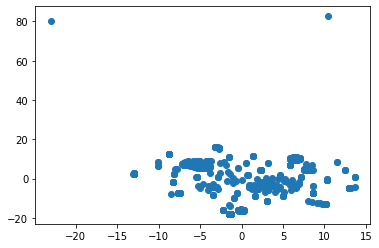

In [41]:
# Plot t-SNE output

plt.scatter(X_tsne[:,0], X_tsne[:,1])
plt.show()

In [42]:
# Identify clusters with k-means

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_pca)
    inertia.append(km.inertia_)

C:\Users\wpj17\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [43]:
# Create an elbow plot

# Prepare plot dataframe
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,46979.075160
1,2,45909.857193
2,3,44845.490039
3,4,43778.700400
4,5,42518.641991


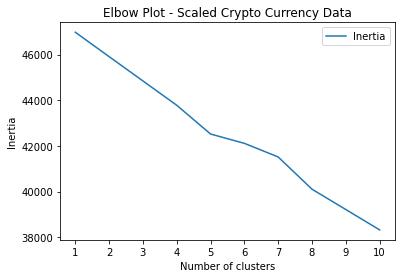

In [47]:
# Plot the data

plt.plot(df_elbow['k'], df_elbow['inertia'], label='Inertia')
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot - Scaled Crypto Currency Data')
plt.legend()
plt.show()